<a href="https://colab.research.google.com/github/mrh-rakib/AI-cybersec/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

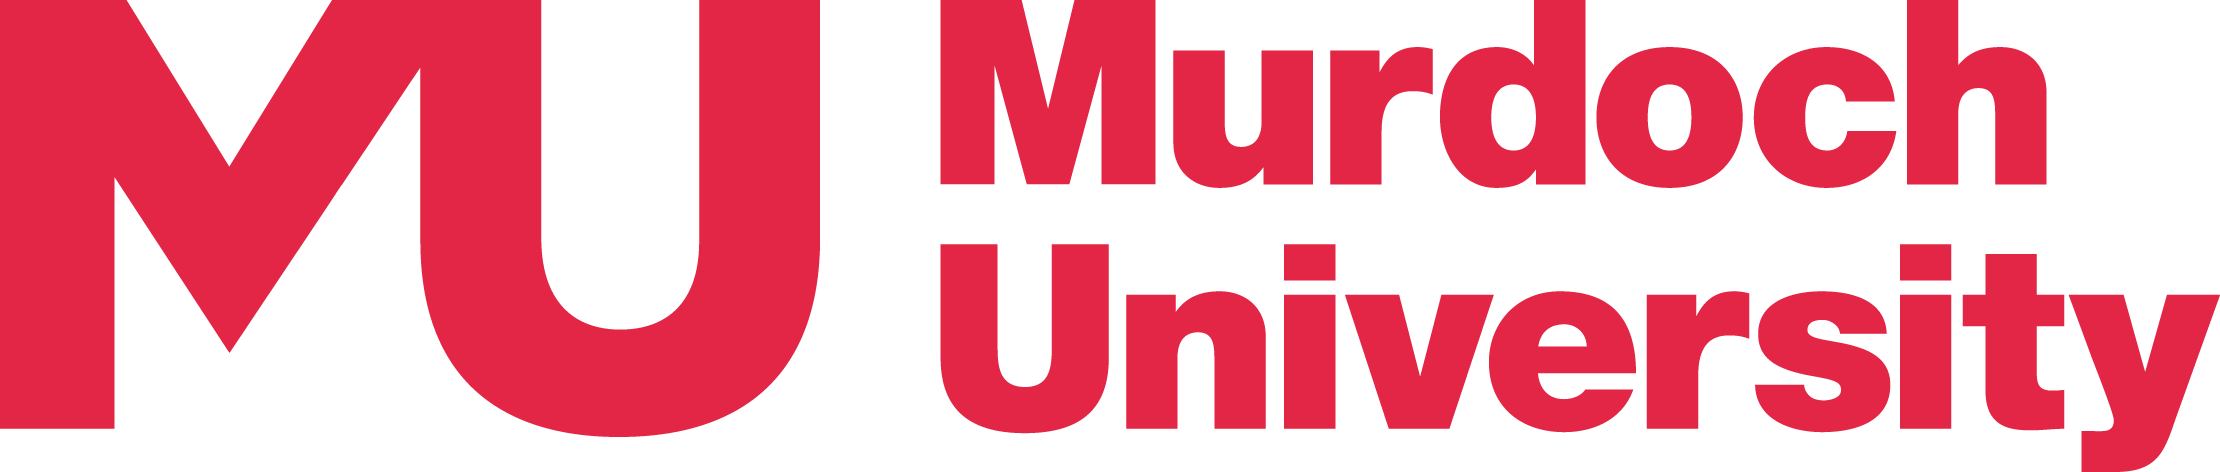

# Lab 5: Intrusion detection and data preprocessing
**Intrusion detection** is the process of monitoring computer networks or systems for unauthorized access or malicious activity. The goal of intrusion detection is to identify any abnormal behavior or security violations in a system or network and alert security personnel or automated response systems to take appropriate action.

In this laboratory, we will use the KDD Cup 1999 dataset, which is a widely used dataset for evaluating intrusion detection systems. It contains a sample of network traffic data from the DARPA 1998 Intrusion Detection System Evaluation, which aimed to evaluate the ability of intrusion detection systems to detect various types of network attacks.

The dataset includes network connections, each represented by 41 features. The connections are classified into one of five categories: normal, DoS, probe, R2L (unauthorized access from a remote machine), and U2R (unauthorized access to local superuser privileges).

The 41 features include basic features such as duration, protocol type, and service, as well as more detailed features such as number of failed login attempts, number of root accesses, and number of file creations. Some features are continuous, while others are categorical or binary.

**Data preprocessing** is the process of preparing raw data for analysis by applying various techniques to make the data more useful and meaningful. It involves transforming data into a format that can be easily analyzed by machine learning algorithms

### Load and orgainse the dataset
Download the dataset from [Kaggle](https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.data_10_percent.gz). Unzip and upload *kddcup.data_10_percent.gz* file into */content* folder of your colab session.

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
# feature_names found from https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?resource=download&select=kddcup.names
feature_names=['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [334]:
len(feature_names)

42

In [335]:
# attack_types found from https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?resource=download&select=training_attack_types
# dot (.) added with each type to match the dataset
attack_types = {
    'normal.': 'normal',
    'back.': 'dos',
    'buffer_overflow.': 'u2r',
    'ftp_write.': 'r2l',
    'guess_passwd.': 'r2l',
    'imap.': 'r2l',
    'ipsweep.': 'probe',
    'land.': 'dos',
    'loadmodule.': 'u2r',
    'multihop.': 'r2l',
    'neptune.': 'dos',
    'nmap.': 'probe',
    'perl.': 'u2r',
    'phf.': 'r2l',
    'pod.': 'dos',
    'portsweep.': 'probe',
    'rootkit.': 'u2r',
    'satan.': 'probe',
    'smurf.': 'dos',
    'spy.': 'r2l',
    'teardrop.': 'dos',
    'warezclient.': 'r2l',
    'warezmaster.': 'r2l',
}

In [336]:
# Load the dataset
df = pd.read_csv("kddcup.data_10_percent.gz", names=feature_names)

In [337]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [338]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [339]:
attack_types['back.']

'dos'

In [340]:
# adding attack_type column
df['attack_type'] = df.target.apply(lambda r:attack_types[r])

In [341]:
df.drop(['target'],axis=1,inplace=True)

In [342]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [343]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

<Axes: >

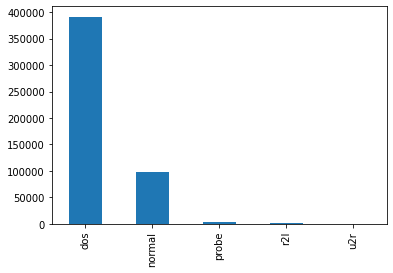

In [344]:
# Visualisation
df['attack_type'].value_counts().plot(kind="bar")

### Removing NA values and constant features

In [345]:
df.isna().any() # checking NA values

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [346]:
# df.dropna('columns',inplace=True)

In [347]:
df = df[[col for col in df if df[col].nunique()>1]] # keep columns where there are more than 1 unique values

In [348]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


### Removing highly-correlated features

<Axes: >

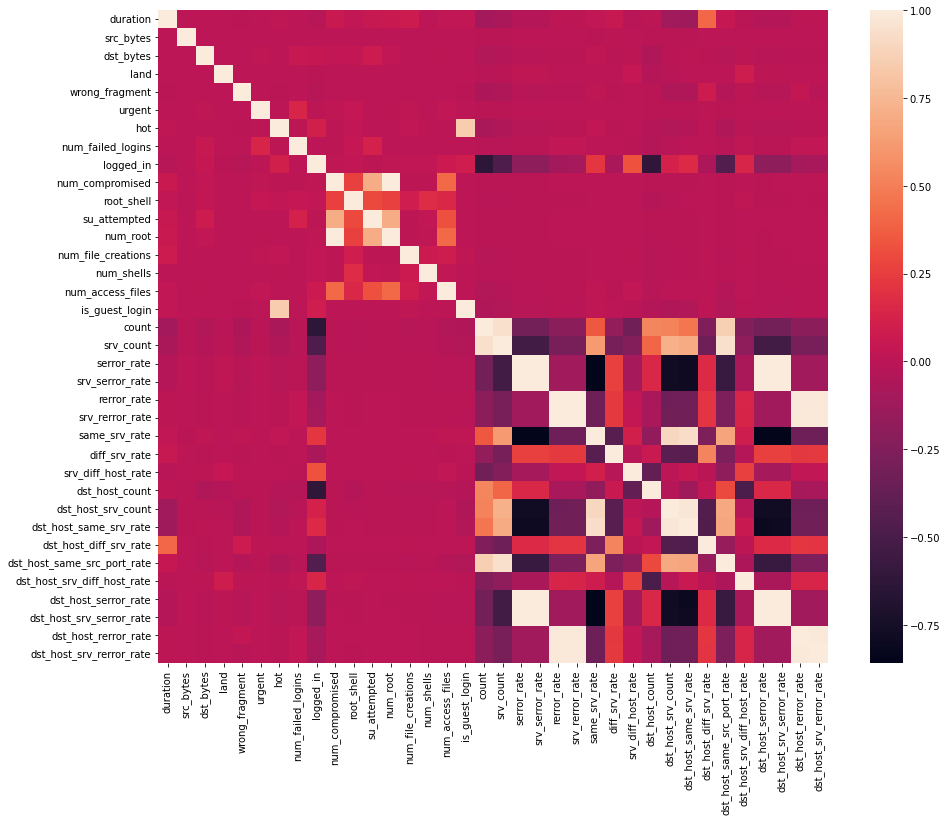

In [349]:
corr = df.corr() # Pearson correlation coefficient between the columns
plt.figure(figsize=(15,12)) # creates a new figure with a specified size of 15 inches by 12 inches.
sns.heatmap(corr) # creates a heatmap of the correlation matrix using seaborn 

In [ ]:
# num_root is highly correlated with num_compromised and should be ignored for analysis.
df.drop('num_root',axis = 1,inplace = True) # axis=1 specifies that we want to drop the columns axis

# srv_serror_rate is highly correlated with serror_rate and should be ignored for analysis.
df.drop('srv_serror_rate',axis = 1,inplace = True)

# srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('srv_rerror_rate',axis = 1, inplace=True)

# dst_host_srv_serror_rate is highly correlated with srv_serror_rate and should be ignored for analysis.
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

# dst_host_serror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

# dst_host_rerror_rate is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

# dst_host_srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

# dst_host_same_srv_rate is highly correlated with dst_host_srv_count and should be ignored for analysis.
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

# srv_count is highly correlated with count and should be ignored for analysis.
df.drop('srv_count',axis = 1, inplace=True)

<Axes: >

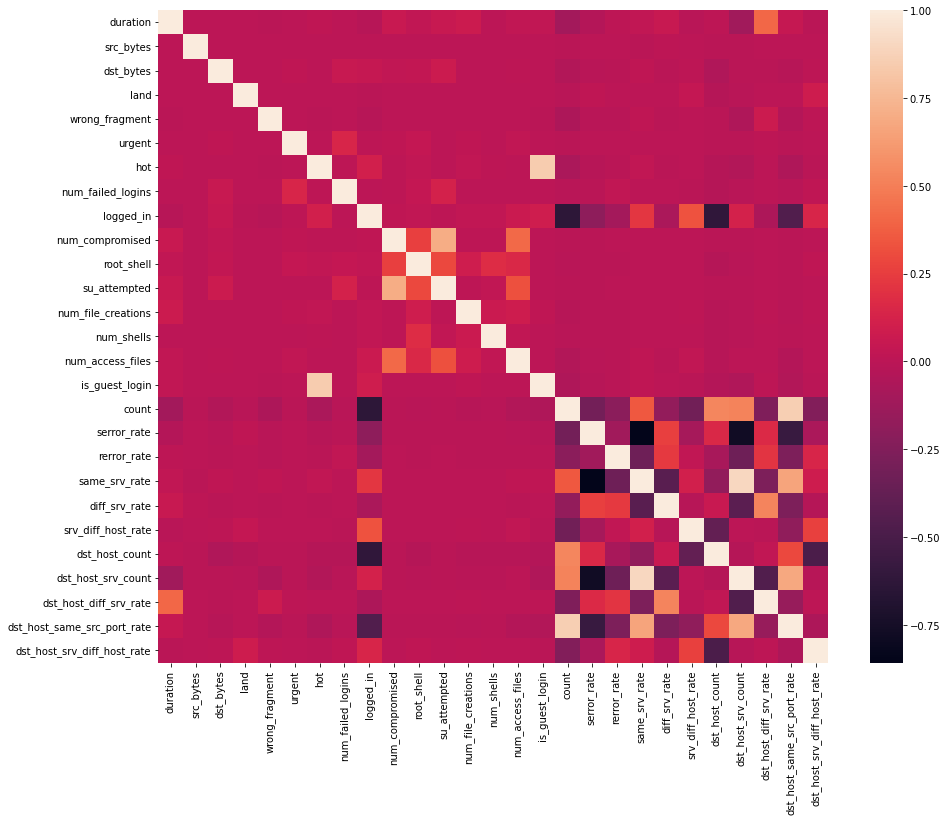

In [351]:
corr = df.corr() # Pearson correlation coefficient between the columns
plt.figure(figsize=(15,12)) # creates a new figure with a specified size of 15 inches by 12 inches.
sns.heatmap(corr) # creates a heatmap of the correlation matrix using seaborn 

## Label encoding the features

In [352]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,normal


In [353]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
pmap = {"icmp":0,"tcp":1,"udp":2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [355]:
df['protocol_type'].value_counts()

0    283602
1    190065
2     20354
Name: protocol_type, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
#attack type feature mapping
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['attack_type'] = df['attack_type'].map(amap)

In [358]:
df["service"].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [ ]:
df.drop('service',axis = 1,inplace= True)

In [360]:
df

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05,1
494017,0,1,0,282,2286,0,0,0,0,0,...,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05,1
494018,0,1,0,203,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05,1
494019,0,1,0,291,1200,0,0,0,0,0,...,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05,1


## Building an artificial neural network classifier
Artificial neural network consists of a network of interconnected nodes, or artificial neurons, that can receive input data, process that data through a series of mathematical computations, and produce output data.

The neurons in a neural network are organized into layers, with each layer processing information and passing it on to the next layer until a final output is produced. Neural networks can be trained on a set of labeled data to learn patterns and relationships within that data, and then can be used to make predictions or classify new, unlabeled data.

In a neural network, weights and biases are the parameters that determine the behavior and output of the network.

Weights are the numerical values that are assigned to the connections between neurons in the network. These weights are learned during the training process, where the network is shown a set of labeled input-output pairs and adjusts its weights to minimize the difference between the predicted and actual outputs. The weights essentially control the strength and direction of the connections between neurons, and can greatly affect the accuracy and performance of the network.

Biases, on the other hand, are the values that are added to the output of each neuron in the network. These values are also learned during training, and help to adjust the overall output of the network. Biases can help to account for differences in the data and make the network more flexible and robust.

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [362]:
y = df[['attack_type']]
X = df.drop(['attack_type'],axis=1)

In [363]:
y

,attack_type
0,1
1,1
2,1
3,1
4,1
...,...
494016,1
494017,1
494018,1
494019,1


In [364]:
X

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,0,181,5450,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00
1,0,1,0,239,486,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00
2,0,1,0,235,1337,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00
3,0,1,0,219,1337,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00
4,0,1,0,217,2032,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05
494017,0,1,0,282,2286,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05
494018,0,1,0,203,1200,0,0,0,0,0,...,0.17,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05
494019,0,1,0,291,1200,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05


In [365]:
scaler = MinMaxScaler() #  MinMaxScaler scales the data to a fixed range (by default, between 0 and 1) by subtracting the minimum value and dividing by the range of the data.
X = scaler.fit_transform(X)

In [366]:
X

array([[0.  , 0.5 , 0.  , ..., 0.  , 0.11, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.03, 0.  ],
       ...,
       [0.  , 0.5 , 0.  , ..., 0.  , 0.06, 0.05],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.04, 0.05],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.17, 0.05]])

In [367]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(330994, 29) (163027, 29)
(330994, 1) (163027, 1)


In [368]:
model = Sequential([
    Dense(8, activation="relu",input_dim=X_train.shape[1]),
    Dropout(0.01),
    Dense(5,activation="softmax")
])

* 8 is the number of neurons (or units) in the layer. This is a hyperparameter that can be tuned to control the capacity and complexity of the neural network.
* activation='relu' specifies the activation function to be used for the layer. The 'relu' function is a common choice for hidden layers in neural networks, as it is efficient to compute and has been shown to work well in practice.
* input_dim=X_train.shape[1] specifies the input dimension of the layer. In this case, it indicates that the layer expects an input with X_train.shape[1] features. The input dimension is only required for the first layer of the neural network, as the subsequent layers will automatically infer the input dimension from the output of the previous layer.

In [369]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

* optimizer="adam" specifies the optimizer algorithm to be used during training. In this case, the Adam optimization algorithm will be used. Adam is a popular gradient descent optimization algorithm that is computationally efficient and works well in practice for a wide range of neural network architectures and problems.
* loss="sparse_categorical_crossentropy" specifies the loss function to be used during training. The sparse_categorical_crossentropy loss function is commonly used for multi-class classification problems, where each example belongs to exactly one class. This function calculates the cross-entropy loss between the predicted probabilities and the true class labels, and it is used to measure how well the model is performing during training.
* metrics=["accuracy"] specifies the evaluation metric(s) to be used during training and testing. In this case, the metric being used is "accuracy". This metric calculates the proportion of correctly classified examples out of all the examples in the dataset, and it is a commonly used metric for classification problems.

In [370]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 240       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 5)                 45        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [371]:
history = model.fit(X_train,y_train.values.ravel(),epochs=5,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
10344/10344 [==============================] - 22s 2ms/step - loss: 0.0805 - accuracy: 0.9776 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 2/5
10344/10344 [==============================] - 18s 2ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0104 - val_accuracy: 0.9979
Epoch 3/5
10344/10344 [==============================] - 18s 2ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.0073 - val_accuracy: 0.9983
Epoch 4/5
10344/10344 [==============================] - 17s 2ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0065 - val_accuracy: 0.9983
Epoch 5/5
10344/10344 [==============================] - 18s 2ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0059 - val_accuracy: 0.9986


* X_train: The input features of the training dataset. This is a NumPy array or Pandas DataFrame that contains the independent variables that will be used to predict the dependent variable.
* y_train.values.ravel(): The target variable of the training dataset. This is a NumPy array or Pandas Series that contains the dependent variable that the model is trying to predict. The ravel() method is used to convert a 2D array to a 1D array, which is required by some Keras models.
* epochs=5: The number of times the entire training dataset will be used to update the weights of the neural network model. One epoch is defined as one iteration over the entire training dataset.
* batch_size=32: The number of samples that will be used in each update of the model weights. The training dataset is divided into batches of this size, and the weights are updated after each batch. A smaller batch size can lead to more frequent updates and faster convergence, but it can also increase training time and memory usage.

In [372]:
history_dict = history.history

In [373]:
history_dict

{'loss': [0.08048062771558762,
  0.016728220507502556,
  0.00982823595404625,
  0.007843355648219585,
  0.0069283852353692055],
 'accuracy': [0.9775705933570862,
  0.9947400689125061,
  0.997715950012207,
  0.9979214072227478,
  0.998202383518219],
 'val_loss': [0.021389702335000038,
  0.01035002525895834,
  0.007265952881425619,
  0.0065007745288312435,
  0.00593067379668355],
 'val_accuracy': [0.9932403564453125,
  0.9979451298713684,
  0.9983192682266235,
  0.998288631439209,
  0.9985830783843994]}

In [374]:
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1,len(train_loss)+1)

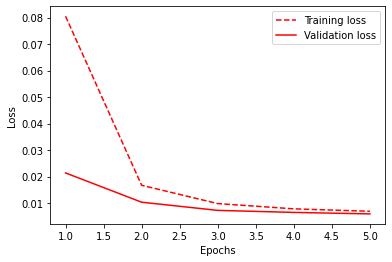

In [382]:
plt.plot(epochs,train_loss,'r--',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

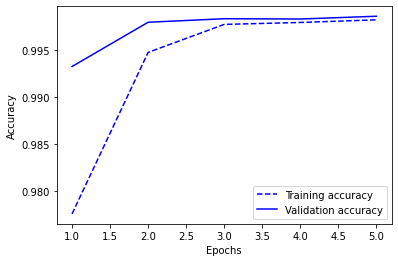

In [383]:
plt.plot(epochs,train_acc,'b--',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Evaluate test performance separately

In [377]:
test_pred = model.predict(X_test)

5095/5095 [==============================] - 5s 971us/step




*   model.predict(X_test) applies the trained neural network model to the input features X_test to generate predicted values for the target variable. The output of this function is a NumPy array containing the predicted values for each sample in the test dataset.



In [ ]:
test_pred

In [ ]:
y_test

In [ ]:
test_acc = accuracy_score(y_test, np.argmax(test_pred, axis=1))

* y_test is the actual target variable values for the test dataset.
* test_pred is the predicted target variable values for the test dataset.
* The np.argmax(test_pred, axis=1) function returns the index of the maximum value in each row of test_pred, which corresponds to the predicted class label.
* accuracy_score(y_test, np.argmax(test_pred, axis=1)) calculates the accuracy of the predicted labels by comparing them to the actual labels in y_test.

In [381]:
test_acc

0.9985830567942734

0.9985830567942734

NB: Parts of this program is taken and improved from https://www.kaggle.com/code/iamyajat/intrusion-detection-system-using-neural-networks, which has been released under the Apache 2.0 open source license

## Practice tast
On the same KDD Cup dataset, apply convolutional neural networks and report performance with different hyperparameters (such as, optimizer, activation function, learning rate, dropout, etc.).